In [35]:
## import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LonelyFriday/NBAallStar2020Prediction/master/nba_final.csv') ## ข้อมูลปี 2016 - 2019
data.rename(columns={'Player.x':'PLAYER','FG':'FGM', 'FG.':'FG%', 'FT.':'FT%', 'TRB':'REB'}, inplace=True) ## ตั้งชื่อ Columns ใหม่

data['FG%'] = data['FG%'] * 100 ## ทำให้เป็น %
data['FT%'] = data['FT%'] * 100 ## ทำให้เป็น %

data

,Rk,PLAYER,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,FGM,FGA,FG%,X3P,X3PA,X3P.,X2P,X2PA,X2P.,eFG.,FT,FTA,FT%,ORB,DRB,REB,AST,STL,BLK,TOV,PF,PTS,Salary,mean_views,Season,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,0.8,1.9,40.5,0.2,0.5,0.500,0.5,1.5,0.375,0.464,0.4,0.9,45.0,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2,NaN,3.320000,2016-17,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,1.9,4.6,40.3,0.7,2.0,0.375,1.1,2.6,0.424,0.483,0.5,0.6,80.0,0.3,0.8,1.1,1.9,0.4,0.1,1.0,1.4,5.0,2700000.0,11.155738,2016-17,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,4.9,10.8,45.4,1.0,3.3,0.288,4.0,7.5,0.528,0.499,2.0,2.7,71.9,1.5,3.6,5.1,1.9,0.8,0.5,1.1,2.2,12.7,4351320.0,1713.986339,2016-17,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,1.3,3.0,42.6,0.2,0.8,0.200,1.1,2.2,0.513,0.454,0.8,1.1,73.7,0.5,1.3,1.8,0.4,0.4,0.4,0.4,1.8,3.5,2022240.0,205.855191,2016-17,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,3.0,7.6,39.3,1.1,3.5,0.330,1.9,4.2,0.445,0.468,1.6,2.2,70.6,1.3,6.1,7.4,1.6,1.0,0.7,1.5,1.7,8.7,7680965.0,604.341530,2016-17,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,Zach Collins,colliza01,C,NaN,21,POR,77,0,17.6,2.5,5.2,47.3,0.5,1.6,0.331,1.9,3.6,0.534,0.523,1.2,1.6,74.6,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6,3628920.0,470.320548,2018-19,West,Front,16287,74,1.0,52.0,0.0,8.0,86.8,No
1404,294,Zach LaVine,lavinza01,SG,NaN,23,CHI,63,62,34.5,8.4,18.0,46.7,1.9,5.1,0.374,6.5,12.9,0.504,0.520,5.0,6.0,83.2,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7,19500000.0,1415.268493,2018-19,Est,Back,519746,7,17.0,8.0,0.0,8.0,36.5,No
1405,308,Zach Lofton,loftoza01,SG,NaN,26,DET,1,0,4.0,0.0,1.0,0.0,0.0,1.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,77250.0,NaN,2018-19,Est,Back,136,114,0.0,61.0,0.0,8.0,132.2,No
1406,393,Zaza Pachulia,pachuza01,C,NaN,34,DET,68,3,12.9,1.3,2.8,44.0,0.0,0.1,0.000,1.3,2.8,0.450,0.440,1.4,1.8,78.2,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9,2393887.0,1183.576503,2018-19,Est,Front,21525,50,2.0,41.0,0.0,7.0,69.8,No


In [3]:
data_2020 = pd.read_csv('https://raw.githubusercontent.com/LonelyFriday/NBAallStar2020Prediction/master/NBA2020.csv')  ## ข้อมูลปี 2019-2020
data_2020.dropna(inplace=True) ## ตัดข้อมูลที่มี NA
data_2020.rename(columns={'MIN':'MP'}, inplace=True) ## ตั้งชื่อ Columns ใหม่

data_2020

,Number,PLAYER,TEAM,AGE,GP,W,L,MP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Play
0,1.0,James Harden,HOU,30.0,48.0,32.0,16.0,37.1,35.4,10.2,23.4,43.5,4.6,12.8,35.8,10.5,12.0,86.9,1.1,5.4,6.5,7.3,4.5,1.7,0.9,3.3,57.5,16.0,2.0,4.3,Yes
1,2.0,Giannis Antetokounmpo,MIL,25.0,47.0,40.0,7.0,30.8,30.2,11.1,20.1,55.3,1.6,5.0,31.3,6.4,10.5,61.2,2.4,10.9,13.4,5.8,3.6,1.1,1.0,3.1,57.7,42.0,4.0,10.3,Yes
2,3.0,Damian Lillard,POR,29.0,50.0,24.0,26.0,37.0,29.6,9.3,20.3,46.1,3.9,10.0,39.3,7.0,7.8,89.0,0.5,3.8,4.3,8.0,2.9,1.0,0.3,1.7,47.7,15.0,1.0,1.1,Yes
3,4.0,Trae Young,ATL,21.0,47.0,12.0,35.0,34.9,29.3,9.2,20.6,44.5,3.4,9.3,37.0,7.6,8.9,84.5,0.6,4.0,4.6,9.0,4.9,1.1,0.1,1.7,47.3,19.0,2.0,-4.2,Yes
4,5.0,Bradley Beal,WAS,26.0,42.0,13.0,29.0,35.6,29.2,9.9,21.7,45.5,2.6,7.9,32.6,6.8,8.1,84.7,1.0,3.5,4.5,6.3,3.2,1.0,0.4,2.2,45.0,7.0,0.0,-5.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,488.0,Miye Oni,UTA,22.0,3.0,2.0,1.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.3,0.0,0.0,0.0,0.1,0.0,0.0,-4.0,No
495,488.0,Stanton Kidd,UTA,27.0,4.0,3.0,1.0,3.8,0.0,0.0,0.8,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.3,0.5,0.0,0.0,0.8,0.8,0.0,0.0,-0.3,No
496,488.0,Talen Horton-Tucker,LAL,19.0,2.0,1.0,1.0,2.7,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,3.0,0.0,0.0,-3.5,No
497,488.0,Vic Law,ORL,24.0,2.0,0.0,2.0,1.8,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,No


In [4]:
data_all = pd.concat([data, data_2020])[['PLAYER', 'MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%', 'Play']]  ## รวม 2 dataframe เข้าด้วยกัน

data_all['FG%'] = data_all['FG%'].fillna(data_all['FG%'].mean())  ## fill NaN with Mean
data_all['FT%'] = data_all['FT%'].fillna(data_all['FT%'].mean())  ## fill NaN with Mean

data_all.index = range(len(data_all))  ## clear index

data_all

,PLAYER,MP,PTS,AST,REB,STL,BLK,TOV,FGM,FGA,FG%,FT%,Play
0,A.J. Hammons,7.4,2.2,0.2,1.6,0.0,0.6,0.5,0.8,1.9,40.5,45.0,No
1,Aaron Brooks,13.8,5.0,1.9,1.1,0.4,0.1,1.0,1.9,4.6,40.3,80.0,No
2,Aaron Gordon,28.7,12.7,1.9,5.1,0.8,0.5,1.1,4.9,10.8,45.4,71.9,No
3,Adreian Payne,7.5,3.5,0.4,1.8,0.4,0.4,0.4,1.3,3.0,42.6,73.7,No
4,Al-Farouq Aminu,29.1,8.7,1.6,7.4,1.0,0.7,1.5,3.0,7.6,39.3,70.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,Miye Oni,2.8,0.0,0.0,0.3,0.0,0.0,0.3,0.0,0.0,0.0,0.0,No
1903,Stanton Kidd,3.8,0.0,0.3,0.8,0.0,0.0,0.5,0.0,0.8,0.0,0.0,No
1904,Talen Horton-Tucker,2.7,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,No
1905,Vic Law,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,No


In [6]:
data_all[data_all.Play=='Yes']

,PLAYER,MP,PTS,AST,REB,STL,BLK,TOV,FGM,FGA,FG%,FT%,Play
24,Anthony Davis,36.1,28.0,2.1,11.8,1.3,2.2,2.4,10.3,20.3,50.5,80.2,Yes
59,Carmelo Anthony,34.3,22.4,2.9,5.9,0.8,0.5,2.1,8.1,18.8,43.3,83.3,Yes
95,DeAndre Jordan,31.7,12.7,1.2,13.8,0.6,1.7,1.4,5.1,7.1,71.4,48.2,Yes
99,DeMar DeRozan,35.4,27.3,3.9,5.2,1.1,0.2,2.4,9.7,20.9,46.7,84.2,Yes
100,DeMarcus Cousins,34.2,27.0,4.6,11.0,1.4,1.3,3.7,9.0,19.9,45.2,77.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Domantas Sabonis,34.5,18.3,4.7,12.6,0.8,0.5,2.8,7.3,13.5,54.0,72.8,Yes
1473,Chris Paul,31.6,17.0,6.6,5.0,1.6,0.1,2.1,5.9,12.5,47.7,89.9,Yes
1475,Ben Simmons,36.2,16.6,8.2,7.9,2.1,0.6,3.5,6.6,11.3,58.7,62.1,Yes
1479,Bam Adebayo,34.7,15.9,4.9,10.4,1.2,1.1,2.7,6.1,10.6,58.0,68.8,Yes


## Data 2021

In [125]:
## ข้อมูลที่จะเอามาใช้ Test 
data_2021 = pd.read_csv('https://raw.githubusercontent.com/LonelyFriday/NBAallStar2021Prediction/main/predict_nba_2021.csv') ## ข้อมูลปี 2020-2021

data_2021[['PLAYER', 'MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']]

,PLAYER,MP,PTS,AST,REB,STL,BLK,TOV,FGM,FGA,FG%,FT%
0,Stephen Curry,33.714286,30.142857,5.857143,5.285714,1.178571,0.071429,3.214286,282,565,49.9,93.3
1,Luka Doncic,35.296296,29.074074,9.407407,8.629630,1.000000,0.666667,4.222222,271,571,47.5,79.5
2,Bradley Beal,35.217391,33.086957,4.434783,5.217391,1.391304,0.521739,3.130435,265,557,47.6,89.1
3,Zach LaVine,35.653846,28.153846,5.192308,5.538462,1.038462,0.461538,3.807692,261,507,51.5,85.4
4,Damian Lillard,35.800000,29.240000,7.320000,4.320000,1.040000,0.240000,3.120000,223,499,44.7,93.4
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Jalen Harris,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0,0,0.0,0.0
476,Deividas Sirvydis,1.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0.0
477,Ashton Hagans,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0,0,0.0,0.0
478,Anzejs Pasecniks,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0,1,0.0,0.0


# Model

In [15]:
model_random = RandomForestClassifier()  ## Ensemble Model
model_random.fit(data_all[['MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']], data_all[['Play']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
model_random.predict(data_2021[['MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']])

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes

# Visual prediction


## Predict

In [132]:
data_2021['Predict2021'] = model_random.predict(data_2021[['MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']]) ## เพิ่ม Columns Predict ชื่อว่า Predict2021

print('Number of Candidate =', len(data_2021.loc[data_2021.Predict2021 == 'Yes']))

data_2021.loc[data_2021.Predict2021 == 'Yes'][['PLAYER', 'MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']].head(12) ## แสดง 12 คนแรก

Number of Candidate = 45


,PLAYER,MP,PTS,AST,REB,STL,BLK,TOV,FGM,FGA,FG%,FT%
0,Stephen Curry,33.714286,30.142857,5.857143,5.285714,1.178571,0.071429,3.214286,282,565,49.9,93.3
1,Luka Doncic,35.296296,29.074074,9.407407,8.629630,1.000000,0.666667,4.222222,271,571,47.5,79.5
2,Bradley Beal,35.217391,33.086957,4.434783,5.217391,1.391304,0.521739,3.130435,265,557,47.6,89.1
3,Zach LaVine,35.653846,28.153846,5.192308,5.538462,1.038462,0.461538,3.807692,261,507,51.5,85.4
5,Giannis Antetokounmpo,33.423077,27.961538,5.730769,11.461538,1.115385,1.307692,3.615385,268,476,56.3,63.8
6,LeBron James,34.571429,25.500000,7.964286,8.000000,1.071429,0.500000,3.678571,261,524,49.8,71.0
7,Nikola Jokic,35.846154,26.538462,8.692308,11.500000,1.538462,0.653846,3.461538,266,472,56.4,85.8
8,Julius Randle,36.724138,23.103448,5.620690,11.000000,0.758621,0.206897,3.206897,232,487,47.6,80.2
9,Nikola Vucevic,33.428571,23.678571,3.392857,11.428571,1.107143,0.571429,1.678571,263,545,48.3,81.6
10,Joel Embiid,32.318182,29.636364,2.818182,10.772727,1.272727,1.227273,3.318182,207,381,54.3,85.1


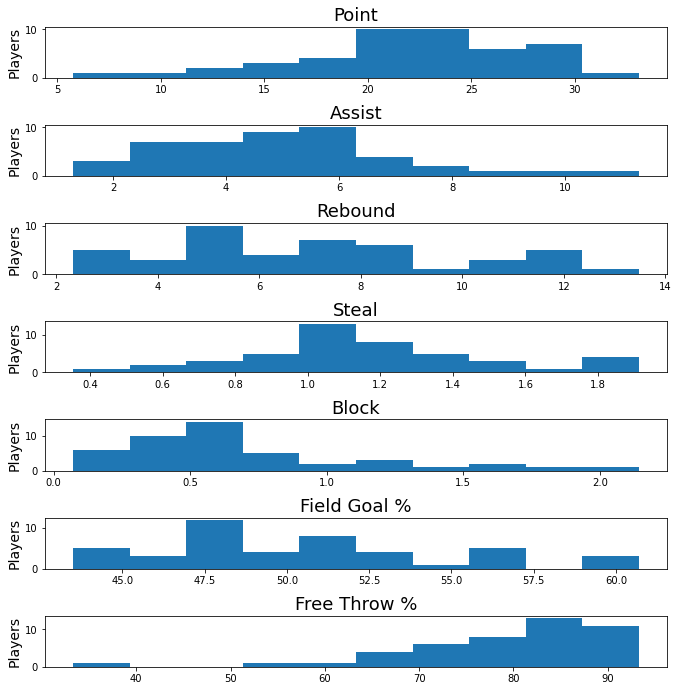

In [117]:
plt.figure(figsize=(10, 10))

plt.subplot(7, 1, 1)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['PTS'], bins=10)
plt.title('Point', fontsize=18)
plt.ylabel('Players', fontsize=14)
plt.tight_layout(pad=3.0)

plt.subplot(7, 1, 2)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['AST'], bins=10)
plt.title('Assist', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 3)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['REB'], bins=10)
plt.title('Rebound', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 4)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['STL'], bins=10)
plt.title('Steal', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 5)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['BLK'], bins=10)
plt.title('Block', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 6)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['FG%'], bins=10)
plt.title('Field Goal %', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 7)
plt.hist(data_2021.loc[data_2021.Predict2021 == 'Yes']['FT%'], bins=10)
plt.title('Free Throw %', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.show()

## Actual 2021

In [123]:
player_2021 = data_2021.loc[(data_2021.PLAYER == 'LeBron James') | (data_2021.PLAYER == 'Luka Doncic') |
              (data_2021.PLAYER == 'Stephen Curry') | (data_2021.PLAYER == 'Nikola Jokic') |
              (data_2021.PLAYER == 'Kawhi Leonard') | (data_2021.PLAYER == 'Giannis Antetokounmpo')|
              (data_2021.PLAYER == 'Bradley Beal') | (data_2021.PLAYER == 'Kevin Durant') |
              (data_2021.PLAYER == 'Joel Embiid') | (data_2021.PLAYER == 'Kyrie Irving')]

player_2021[['PLAYER', 'MP', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG%', 'FT%']]

,PLAYER,MP,PTS,AST,REB,STL,BLK,TOV,FGM,FGA,FG%,FT%
0,Stephen Curry,33.714286,30.142857,5.857143,5.285714,1.178571,0.071429,3.214286,282,565,49.9,93.3
1,Luka Doncic,35.296296,29.074074,9.407407,8.629630,1.000000,0.666667,4.222222,271,571,47.5,79.5
2,Bradley Beal,35.217391,33.086957,4.434783,5.217391,1.391304,0.521739,3.130435,265,557,47.6,89.1
5,Giannis Antetokounmpo,33.423077,27.961538,5.730769,11.461538,1.115385,1.307692,3.615385,268,476,56.3,63.8
6,LeBron James,34.571429,25.500000,7.964286,8.000000,1.071429,0.500000,3.678571,261,524,49.8,71.0
7,Nikola Jokic,35.846154,26.538462,8.692308,11.500000,1.538462,0.653846,3.461538,266,472,56.4,85.8
10,Joel Embiid,32.318182,29.636364,2.818182,10.772727,1.272727,1.227273,3.318182,207,381,54.3,85.1
16,Kawhi Leonard,34.434783,26.739130,5.000000,5.869565,1.782609,0.608696,1.826087,224,437,51.3,87.9
23,Kyrie Irving,35.350000,28.250000,5.650000,4.600000,1.050000,0.750000,2.400000,213,399,53.4,91.8
25,Kevin Durant,35.789474,29.000000,5.263158,7.315789,0.736842,1.421053,3.526316,188,359,52.4,86.9


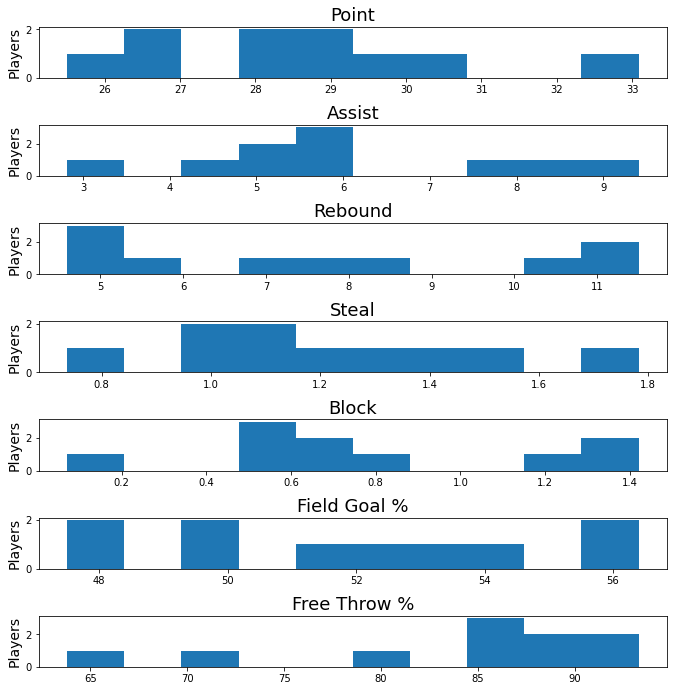

In [121]:
plt.figure(figsize=(10, 10))

plt.subplot(7, 1, 1)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['PTS'], bins=10)
plt.title('Point', fontsize=18)
plt.ylabel('Players', fontsize=14)
plt.tight_layout(pad=3.0)

plt.subplot(7, 1, 2)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['AST'], bins=10)
plt.title('Assist', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 3)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['REB'], bins=10)
plt.title('Rebound', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 4)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['STL'], bins=10)
plt.title('Steal', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 5)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['BLK'], bins=10)
plt.title('Block', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 6)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['FG%'], bins=10)
plt.title('Field Goal %', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.subplot(7, 1, 7)
plt.hist(player_2021.loc[player_2021.Predict2021 == 'Yes']['FT%'], bins=10)
plt.title('Free Throw %', fontsize=18)
plt.ylabel('Players', fontsize=14)

plt.show()